# tut-8 : CodeBasics

1. logistic regression - Binary Classificaion

In [ ]:
# Binary classification - yes or no classification
# multiclass classification - multiple option

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv("insurance_data.csv")
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


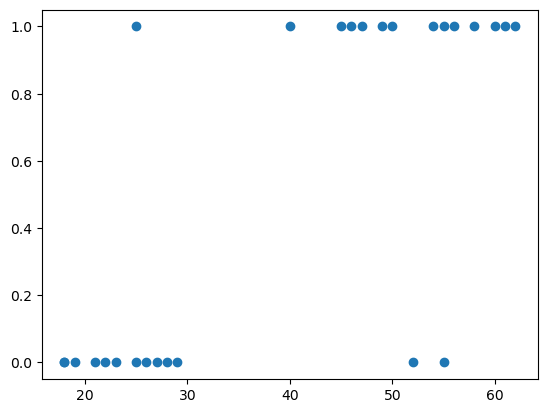

In [4]:
plt.scatter( df['age'] , df['bought_insurance'] )

# sigmoid or Logit Function

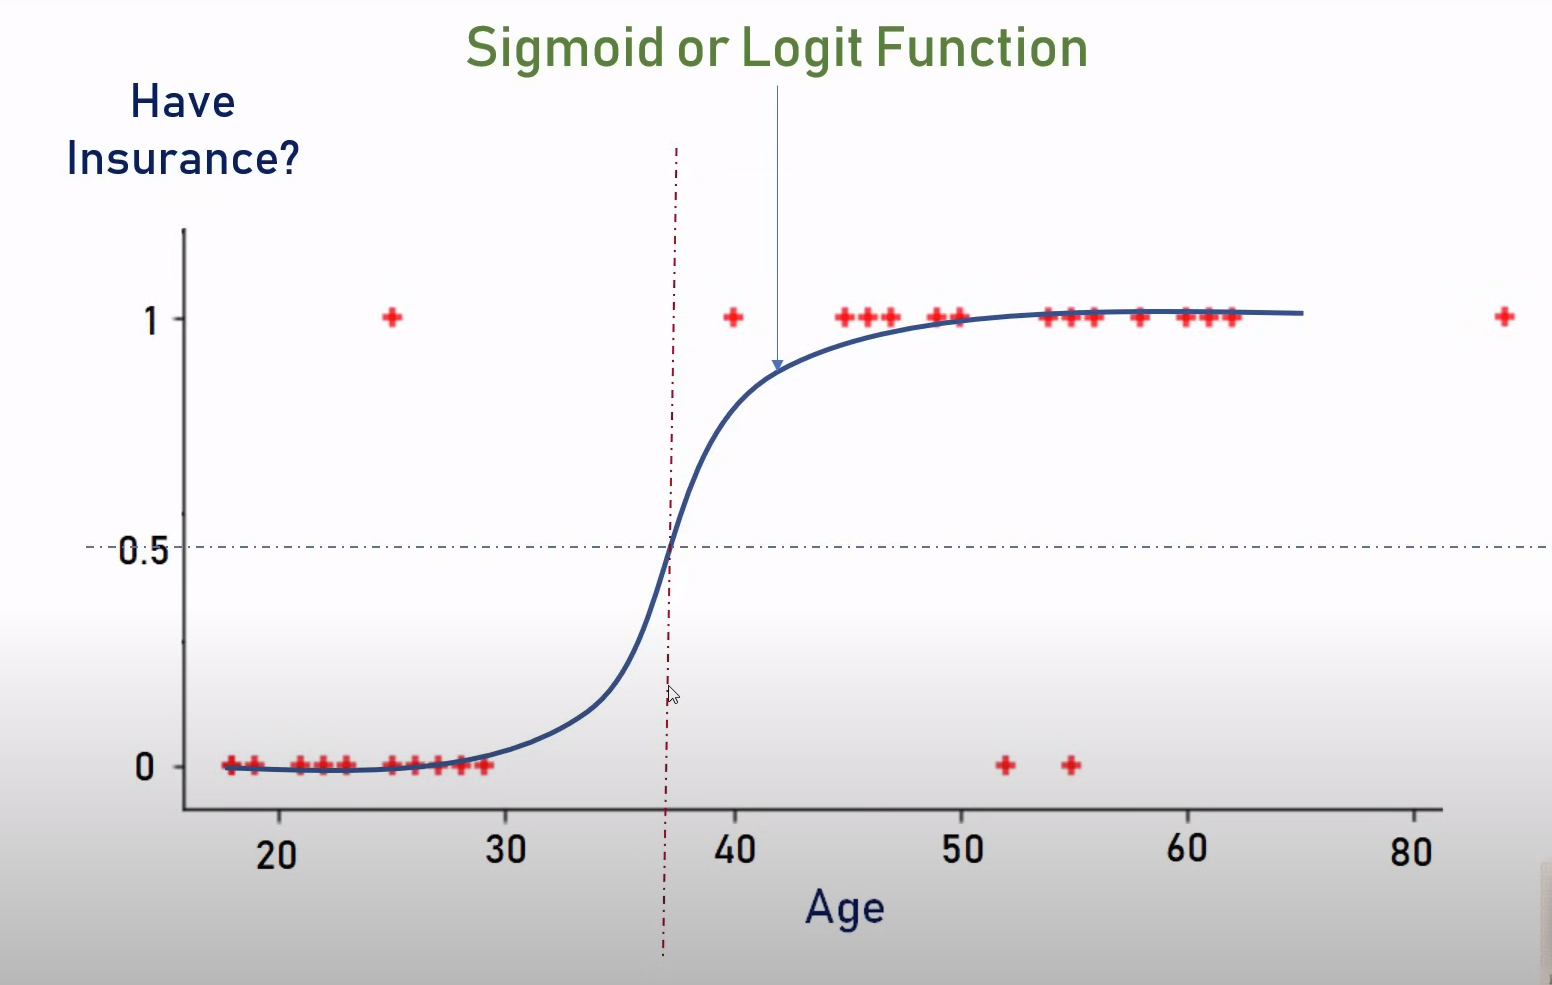

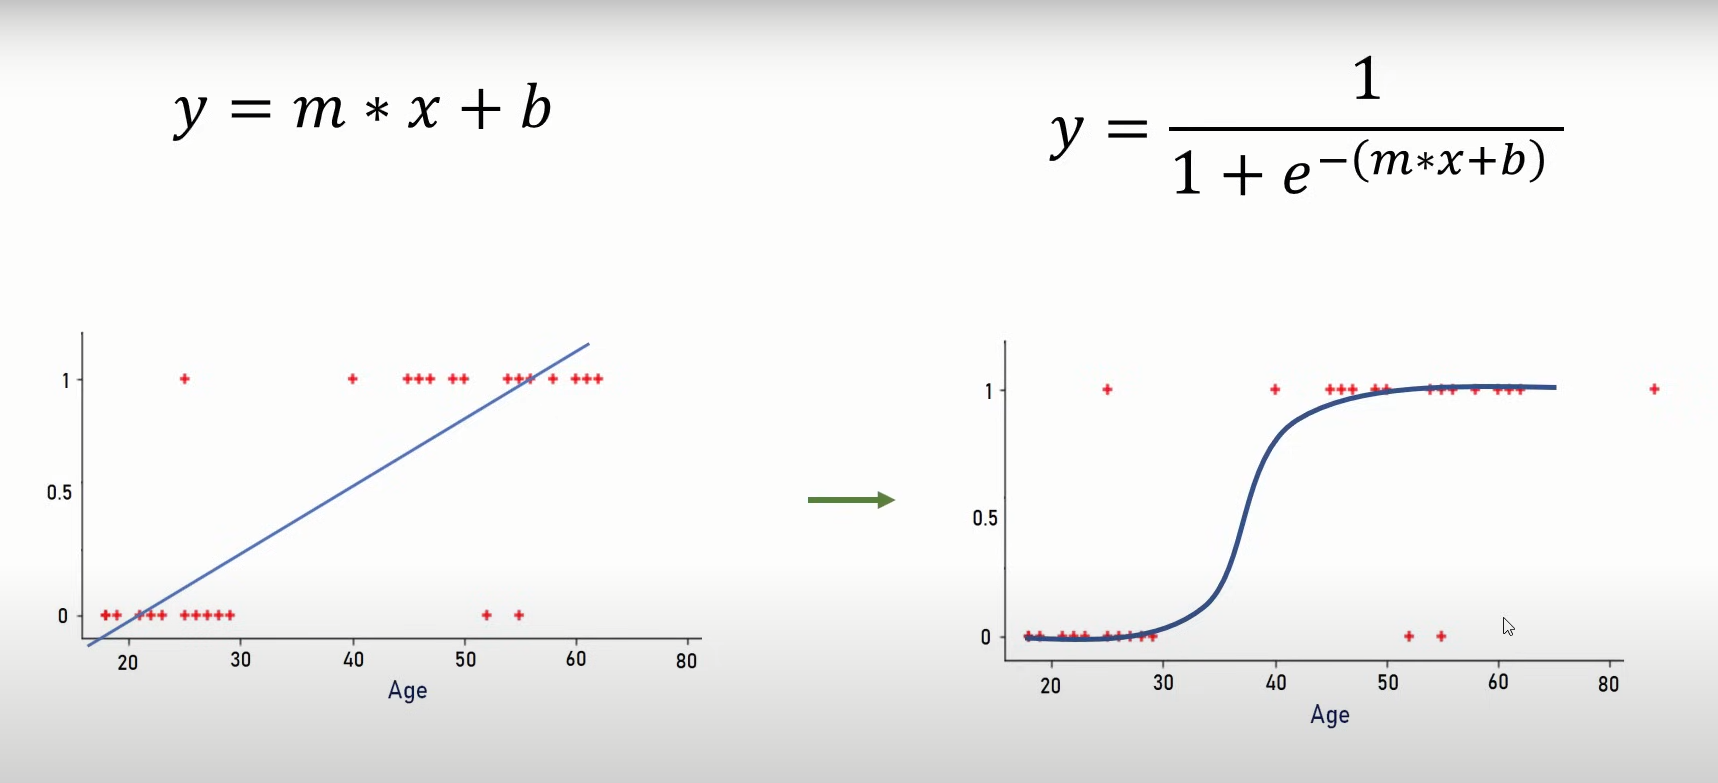

In [6]:
df.shape

(27, 2)

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
X_train , X_test , Y_train , Y_test = train_test_split(df[['age']] , df.bought_insurance , test_size = 0.1 )

In [12]:
X_train

,age
21,26
8,62
17,58
13,29
18,19
11,28
22,40
3,52
7,60
12,27


In [13]:
X_test

,age
10,18
4,46
1,25


# from sklearn.linear_model import LogisticRegression
mod = LogisticRegression()

In [16]:
mod.fit(X_train, Y_train)

LogisticRegression()

In [18]:
mod.predict(X_test)

array([0, 1, 0], dtype=int64)

In [20]:
mod.score(X_test , Y_test)

1.0

In [22]:
mod.predict_proba(X_test)

array([[0.93339859, 0.06660141],
       [0.29274526, 0.70725474],
       [0.85315428, 0.14684572]])

 2. Multiclass classsification

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_digits


In [78]:
digits = load_digits()


In [79]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [80]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

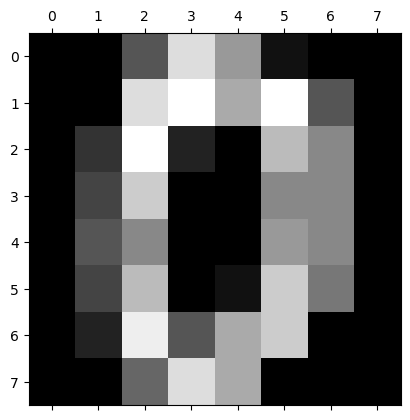

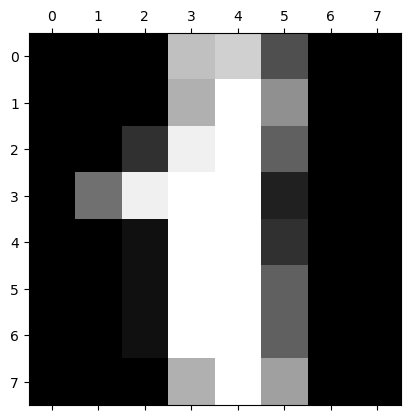

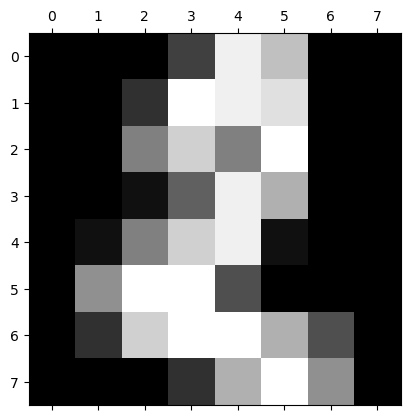

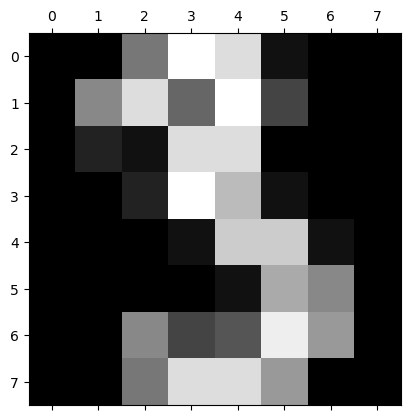

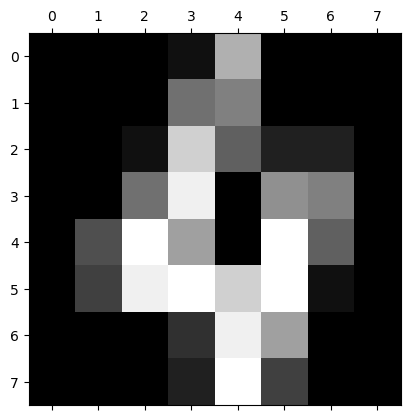

In [81]:
plt.gray()

for i in range(5) :
    plt.matshow(digits.images[i])

In [82]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
x_tr , x_ts , y_tr , y_ts = train_test_split( digits.data , digits.target , test_size=0.2 )

In [85]:
len(x_tr)

1437

In [86]:
len(x_ts)

360

In [92]:
from sklearn.linear_model import LogisticRegression

In [98]:
mod = LogisticRegression(max_iter=10000)

In [99]:
mod.fit(x_tr , y_tr)

LogisticRegression(max_iter=10000)

In [100]:
mod.score(x_ts , y_ts)

0.975

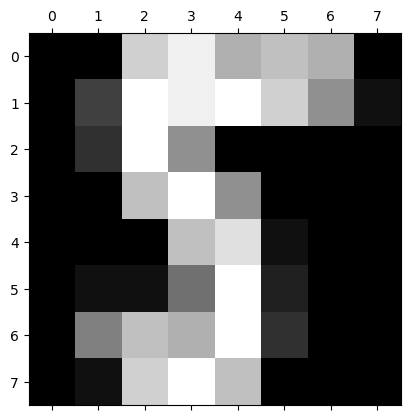

In [101]:
plt.matshow(digits.images[878])

In [102]:
digits.target[878]

5

In [106]:
mod.predict([digits.data[878]])  # predicts corretly

array([5])

In [110]:
mod.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [114]:
# confusion matrix :

y_pred = mod.predict(x_ts)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix( y_ts , y_pred)
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  1,  0,  0,  0,  1,  1],
       [ 0,  1, 37,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 27,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 48,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 41,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 29,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 29,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 33]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

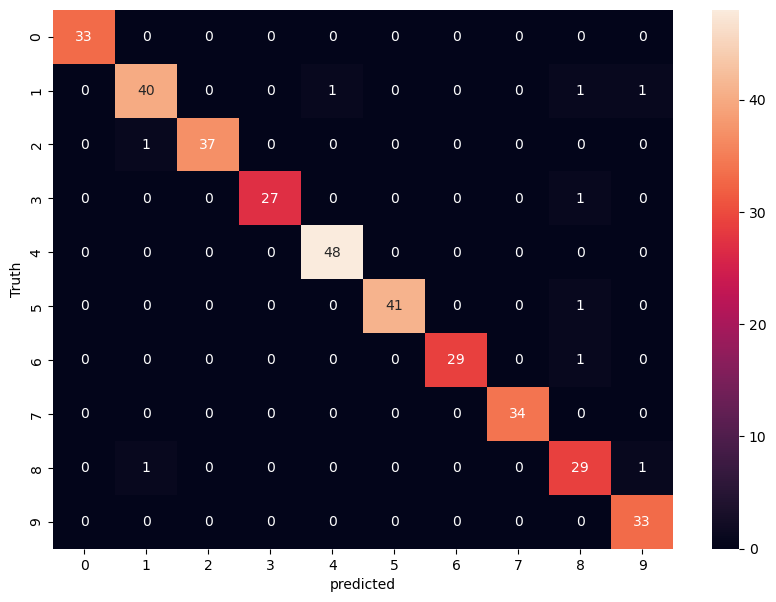

In [115]:
import seaborn as sn
plt.figure( figsize = (10,7) )
sn.heatmap( cm , annot=True )
plt.xlabel('predicted')
plt.ylabel('Truth')

# Exercise :  
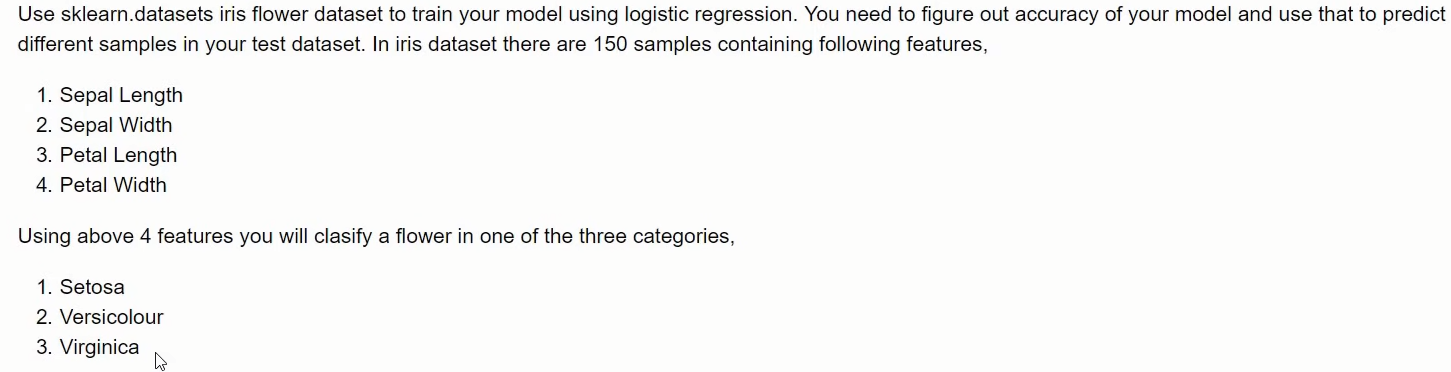

In [131]:
from sklearn.datasets import load_iris
iris = load_iris()

In [132]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [133]:
import pandas as pd

# Create a pandas DataFrame with the Iris dataset
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [128]:
x_tr , x_ts , y_tr , y_ts = train_test_split(iris.data , iris.target , test_size = 0.2)

In [129]:
len(x_tr)

120

In [130]:
len(x_ts)

30

In [134]:
mod2 = LogisticRegression(max_iter=10000)

In [135]:
mod2.fit(x_tr,y_tr)

LogisticRegression(max_iter=10000)

In [136]:
mod2.score(x_ts , y_ts)

0.9666666666666667

In [146]:
mod2_pred = mod2.predict(x_ts)

cm2 = confusion_matrix( y_ts ,mod2_pred)
cm2

array([[ 8,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 11]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

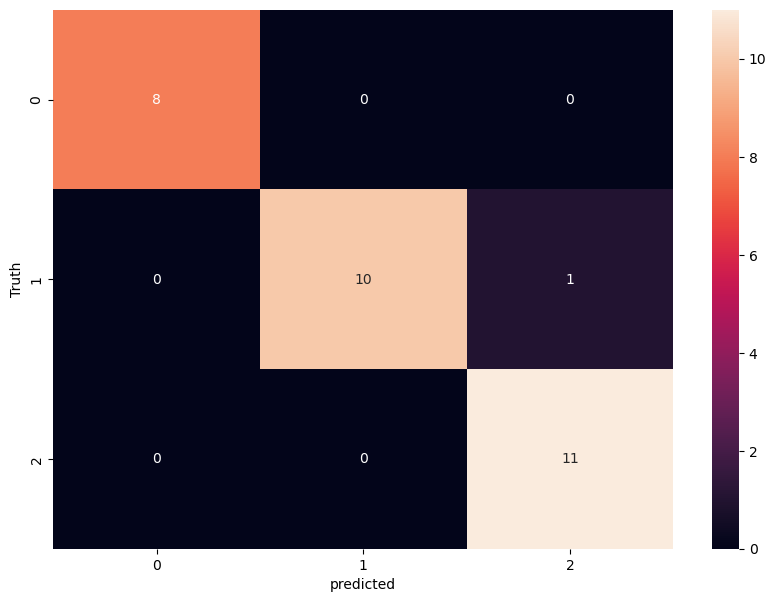

In [147]:
import seaborn as sn
plt.figure( figsize = (10,7) )
sn.heatmap( cm2 , annot=True )
plt.xlabel('predicted')
plt.ylabel('Truth')